# **Importing Dataset**

In [147]:
from google.colab import files
uploaded = files.upload()

Saving Google.csv to Google (3).csv


In [148]:
import io

# **Importing Libraries**

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [150]:
df = pd.read_csv(io.BytesIO(uploaded['Google.csv']))

# **Observing Data**

In [151]:
df.describe()
#df.head()

,Open,High,Low,Close,Adj Close,Volume
count,4041.000000,4041.000000,4041.000000,4041.000000,4041.000000,4.041000e+03
mean,533.983149,538.995819,528.658860,533.999060,533.999060,6.909802e+06
std,383.007917,386.590237,379.488087,383.326004,383.326004,7.895987e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,5.206000e+05
25%,241.211212,243.688690,238.873871,241.036041,241.036041,1.844600e+06
50%,342.592590,345.795807,338.598602,342.177185,342.177185,4.191600e+06
75%,791.979980,798.000000,786.200012,790.460022,790.460022,8.702600e+06
max,1699.520020,1726.099976,1660.189941,1717.390015,1717.390015,8.215110e+07


# **Sorting on the basis of Date**

In [152]:
df = df.sort_values('Date')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4036,2020-08-31,1643.569946,1644.500000,1625.329956,1629.530029,1629.530029,1321100
4037,2020-09-01,1632.160034,1659.219971,1629.530029,1655.079956,1655.079956,1133800
4038,2020-09-02,1668.010010,1726.099976,1660.189941,1717.390015,1717.390015,2476100
4039,2020-09-03,1699.520020,1700.000000,1607.709961,1629.510010,1629.510010,3180200
4040,2020-09-04,1609.000000,1634.989990,1537.970093,1581.209961,1581.209961,2792533


# **Plotting the Google Stock Price Data**

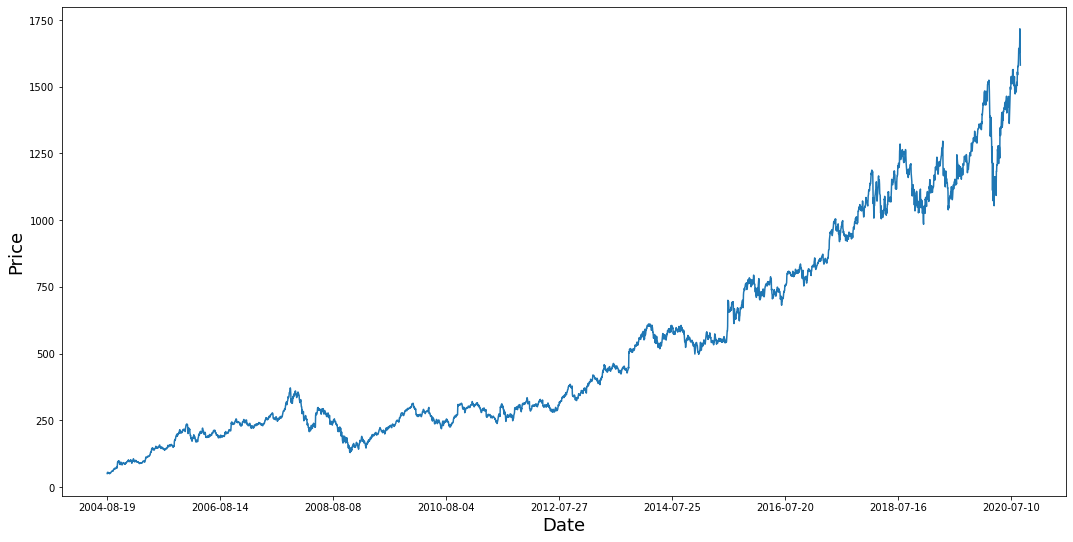

In [153]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),df['Close'])
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

In [154]:
df.shape

(4041, 7)

# **Taking Closing Price of Stocks as Data**

In [155]:
data = df.filter(['Close']).values
data

array([[  50.220219],
       [  54.209209],
       [  54.754753],
       ...,
       [1717.390015],
       [1629.51001 ],
       [1581.209961]])

# **Scalilng the Data in range (0 , 1)**

In [156]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
data_scaled = scaler.fit_transform(data)
data_scaled

array([[9.90592795e-05],
       [2.49149397e-03],
       [2.81868917e-03],
       ...,
       [1.00000000e+00],
       [9.47293131e-01],
       [9.18324717e-01]])

In [157]:
training_data_len = int(len(data)*0.80)
#print(training_data_len)
train_data = data_scaled[0 : training_data_len ,  :]

#print(train_data.shape)
#print(test_data.shape)

# **Creating X and Y Dataset**
#### X will contain data of past 100 days and Y will contain the data of next day

In [158]:

def creating_X_Y_Dataset(data) :
      time_step = 100
      xData = []
      yData = []
      for i in range(time_step , len(train_data)) :
            xData.append(data[i-time_step : i , 0])
            yData.append(data[i , 0])
      return np.array(xData) , np.array(yData)

x_train , y_train = creating_X_Y_Dataset(train_data)
print(x_train.shape)
y_train.shape

(3132, 100)


(3132,)

# **Reshaping the data**
#### Data can not be fed into LSTM without reshaping it in 3D array/matrix

In [159]:
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] , -1))
print(x_train.shape)
y_train.shape

(3132, 100, 1)


(3132,)

# **Creating Model with Layers of LSTM**

In [160]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM , Dropout

model = Sequential()

model.add(LSTM(units = 50, activation = "relu", return_sequences = True, input_shape = (x_train.shape[1], 1)))      # input shape is (number_of_time_steps , number_of_features)
model.add(Dropout(rate = 0.1))

model.add(LSTM(units = 50, activation = "relu", return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(rate = 0.1))

model.add(LSTM(units = 50, activation = "relu" , return_sequences = False))

model.add(Dense(units = 1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
dropout_20 (Dropout)         (None, 100, 50)           0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
dropout_21 (Dropout)         (None, 100, 50)           0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________

# **Fitting Training Data in the Model**

In [161]:
model.fit(x_train , y_train , batch_size = 30 , epochs = 50 , verbose=1)

Epoch 1/50
105/105 [==============================] - 17s 128ms/step - loss: 0.0143
Epoch 2/50
105/105 [==============================] - 14s 129ms/step - loss: 2.4152e-04
Epoch 3/50
105/105 [==============================] - 14s 129ms/step - loss: 2.0953e-04
Epoch 4/50
105/105 [==============================] - 14s 131ms/step - loss: 1.8924e-04
Epoch 5/50
105/105 [==============================] - 14s 130ms/step - loss: 1.6933e-04
Epoch 6/50
105/105 [==============================] - 14s 129ms/step - loss: 1.7877e-04
Epoch 7/50
105/105 [==============================] - 14s 130ms/step - loss: 1.7233e-04
Epoch 8/50
105/105 [==============================] - 14s 131ms/step - loss: 1.7897e-04
Epoch 9/50
105/105 [==============================] - 14s 131ms/step - loss: 1.6058e-04
Epoch 10/50
105/105 [==============================] - 14s 130ms/step - loss: 1.8177e-04
Epoch 11/50
105/105 [==============================] - 14s 130ms/step - loss: 1.7146e-04
Epoch 12/50
105/105 [=============

# **Test Data Formation**

In [174]:
test_data = data_scaled[training_data_len-time_step : len(data_scaled) , : ]
time_step = 100
x_test = []
y_test = data[training_data_len :  , :]
for i in range(time_step , len(test_data)) :
      x_test.append(test_data[i-time_step : i , 0])

x_test = np.array(x_test)
x_test.shape

(809, 100)

# **Reshaping the Test data in 3D array**
#### LSTM takes 3D array as input

In [176]:
x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , 1))
print(x_test.shape)
y_test.shape

(809, 100, 1)


(809, 1)

# **Predicting Values**
#### Prediction done on x_test and then inverse_transform used to unscale it as it has to be compared with original data

In [177]:
scaled_predict = model.predict(x_test)
predict = scaler.inverse_transform(scaled_predict)
predict

array([[ 943.7383 ],
       [ 945.3135 ],
       [ 947.5098 ],
       [ 950.727  ],
       [ 952.57935],
       [ 950.8197 ],
       [ 948.0608 ],
       [ 943.111  ],
       [ 936.7079 ],
       [ 929.339  ],
       [ 923.30426],
       [ 918.5911 ],
       [ 916.5051 ],
       [ 917.41925],
       [ 920.52313],
       [ 925.9168 ],
       [ 932.15796],
       [ 938.68365],
       [ 944.19214],
       [ 949.2692 ],
       [ 953.98676],
       [ 957.72974],
       [ 960.4382 ],
       [ 962.6017 ],
       [ 961.3949 ],
       [ 957.7873 ],
       [ 952.105  ],
       [ 946.42474],
       [ 940.61206],
       [ 935.53735],
       [ 931.7409 ],
       [ 928.6468 ],
       [ 926.8205 ],
       [ 926.0343 ],
       [ 925.76776],
       [ 925.3685 ],
       [ 923.3066 ],
       [ 920.8341 ],
       [ 919.24   ],
       [ 918.39813],
       [ 918.6879 ],
       [ 918.0828 ],
       [ 916.6422 ],
       [ 914.3136 ],
       [ 913.4406 ],
       [ 914.06714],
       [ 915.0305 ],
       [ 915.

# **Root Mean Squared Error Between Actual And Predicted Values**

In [178]:
RMSE = np.sqrt(np.mean(predict - y_test)**2)
RMSE

50.38059577986905

# **Plotting Actual and Predicted Stock Values**

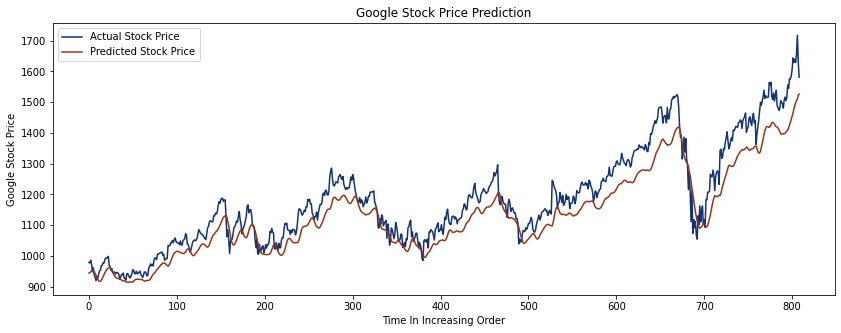

In [185]:
plt.figure(figsize=(14,5))
plt.plot(y_test,color = '#113377', label = 'Actual Stock Price')
plt.plot(predict, color = '#993311', label = 'Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time In Increasing Order')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()